# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [3]:
df = pd.read_csv("data/AviationData_cleaned.csv", low_memory=False)

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [4]:
df["Size.Group"] = np.where(
    df["Estimated.Total.Occupants"] <= 20,
    "Small (<=20)",
    "Large (>20)"
)

small_df = df[df["Size.Group"] == "Small (<=20)"].copy()
large_df = df[df["Size.Group"] == "Large (>20)"].copy()
print("Total rows:", len(df))
print("Small rows:", len(small_df))
print("Large rows:", len(large_df))

Total rows: 16539
Small rows: 16077
Large rows: 462


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

<Axes: xlabel='mean_fatal_serious_rate', ylabel='Make.Clean'>

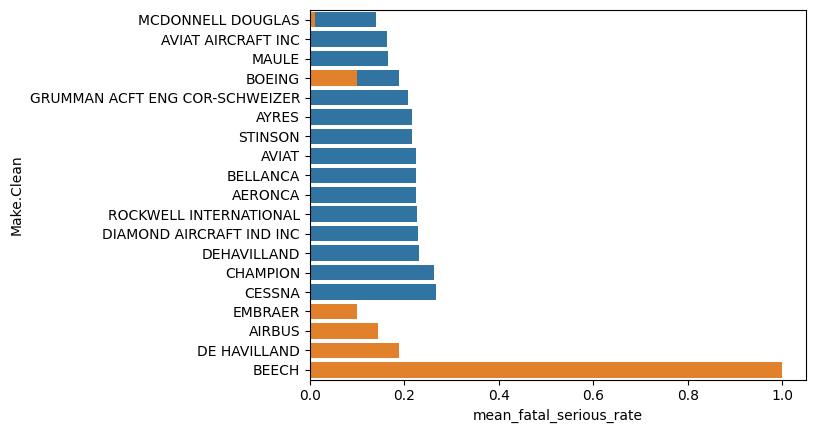

In [7]:
def top_safe_makes(frame, group_label):
    out = (
        frame.groupby("Make.Clean", dropna=True)
        .agg(
            n_events=("Event.Id", "count"),
            mean_fatal_serious_rate=("Fatal.Serious.Rate", "mean")
        )
        .sort_values(["mean_fatal_serious_rate", "n_events"], ascending=[True, False])
        .head(15)
        .reset_index()
    )
    out["Size.Group"] = group_label
    return out

small_top15 = top_safe_makes(small_df, "Small (<=20)")
large_top15 = top_safe_makes(large_df, "Large (>20)")

sns.barplot(
    data=small_top15.sort_values("mean_fatal_serious_rate", ascending=True),
    x="mean_fatal_serious_rate",
    y="Make.Clean"
)

sns.barplot(
    data=large_top15.sort_values("mean_fatal_serious_rate", ascending=True),
    x="mean_fatal_serious_rate",
    y="Make.Clean"
)

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

<Axes: xlabel='Fatal.Serious.Rate', ylabel='Make.Clean'>

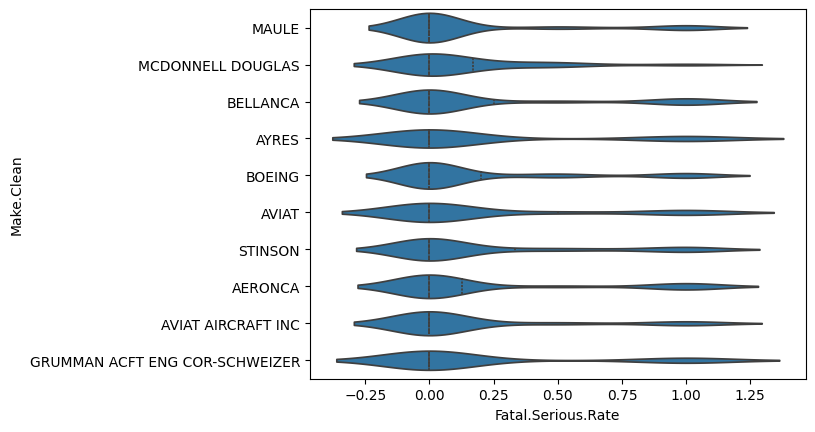

In [14]:
small_make_stats = (
    small_df.groupby("Make.Clean", dropna=True)
    .agg(
        n_events=("Event.Id", "count"),
        mean_fatal_serious_rate=("Fatal.Serious.Rate", "mean")
    )
    .sort_values(["mean_fatal_serious_rate", "n_events"], ascending=[True, False])
)
small_low10_makes = small_make_stats.head(10).index.tolist()
small_violin_data = small_df[small_df["Make.Clean"].isin(small_low10_makes)].copy()
sns.violinplot(
    data=small_violin_data,
    x="Fatal.Serious.Rate",
    y="Make.Clean",
    inner="quartile",
)

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

<Axes: xlabel='Fatal.Serious.Rate', ylabel='Make.Clean'>

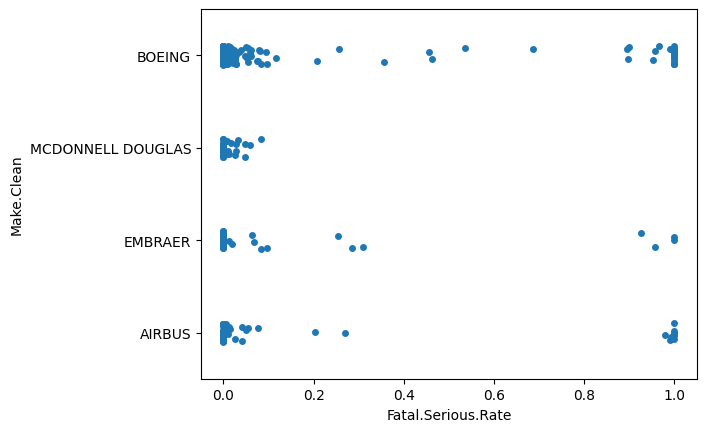

In [15]:
large_make_stats = (
    large_df.groupby("Make.Clean", dropna=True)
    .agg(
        n_events=("Event.Id", "count"),
        mean_fatal_serious_rate=("Fatal.Serious.Rate", "mean")
    )
    .query("n_events >= @min_events_per_make")
    .sort_values(["mean_fatal_serious_rate", "n_events"], ascending=[True, False])
)

large_low10_makes = large_make_stats.head(10).index.tolist()
large_strip_data = large_df[large_df["Make.Clean"].isin(large_low10_makes)].copy()

sns.stripplot(
    data=large_strip_data,
    x="Fatal.Serious.Rate",
    y="Make.Clean",
)

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [16]:
def best_makes_by_destruction(frame, label):
    out = (
        frame.groupby("Make.Clean", dropna=True)
        .agg(
            n_events=("Event.Id", "count"),
            destroyed_rate=("Was.Destroyed", "mean")
        )
        .sort_values(["destroyed_rate", "n_events"], ascending=[True, False])
        .head(15)
        .reset_index()
    )
    out["Size.Group"] = label
    return out
  
small_destroy_top15 = best_makes_by_destruction(small_df, "Small (<=20)")
large_destroy_top15 = best_makes_by_destruction(large_df, "Large (>20)")

display(small_destroy_top15)
display(large_destroy_top15)

,Make.Clean,n_events,destroyed_rate,Size.Group
0,LUSCOMBE,141,0.014184,Small (<=20)
1,GRUMMAN ACFT ENG COR-SCHWEIZER,58,0.017241,Small (<=20)
2,STINSON,129,0.023256,Small (<=20)
3,TAYLORCRAFT,93,0.032258,Small (<=20)
4,AERONCA,200,0.035000,Small (<=20)
5,ERCOUPE,52,0.038462,Small (<=20)
6,AMERICAN CHAMPION AIRCRAFT,51,0.039216,Small (<=20)
7,AVIAT AIRCRAFT INC,76,0.039474,Small (<=20)
8,MAULE,215,0.041860,Small (<=20)
9,DEHAVILLAND,93,0.043011,Small (<=20)


,Make.Clean,n_events,destroyed_rate,Size.Group
0,EMBRAER,51,0.078431,Large (>20)
1,BOEING,297,0.090909,Large (>20)
2,MCDONNELL DOUGLAS,38,0.105263,Large (>20)
3,AIRBUS,68,0.132353,Large (>20)
4,DE HAVILLAND,7,0.142857,Large (>20)
5,BEECH,1,1.000000,Large (>20)


#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.